![imagen](img/python.jpg)

# 8  FastAPI: Primeros pasos
Además de **Flask**, podemos considerar **FastAPI** para desarrollar un backend en Python.<br>

**FastAPI** es un framework moderno, rápido (alto rendimiento), para construir APIs con Python basado en las anotaciones de tipo estándar de Python.

Como siempre, ¡aprenderemos haciendo!

### 8.1 Anotación de Tipos (Type Hinting)

Python es un lenguaje de tipado dinámico, lo que significa que los tipos no se verifican en tiempo de compilación sino en tiempo de ejecución. Esta flexibilidad puede hacer que el desarrollo sea más eficiente, pero también aumenta el riesgo de errores, como argumentos faltantes o discordancias de tipos.

Para abordar esto, Python introdujo la anotación de tipos a partir de la versión 3.5.<br>

La anotación de tipos te permite anotar tu código con información de tipos, indicando los tipos esperados para variables, funciones y clases.
<br>
Si bien esto no convierte a Python en un lenguaje de tipado estático, estas anotaciones son opcionales y no tienen impacto en el comportamiento en tiempo de ejecución del código.

In [1]:
def greeting(name: str) -> str:   # name expects a str and greeting will return a str
    return f"Hello, {name}"

Agregamos el tipo del argumento `name` seguido de dos puntos y especificamos el tipo de retorno usando una flecha. Para tipos básicos como `str` o `int`, podemos usarlos directamente como anotaciones de tipo. Más adelante, exploraremos cómo anotar tipos más complejos, como listas o diccionarios.

A continuación, instalaremos **mypy** para realizar una verificación de tipos en este archivo. El proceso de instalación es el mismo que para cualquier otro paquete de Python:

Cuando prefijes una línea de código con el signo de exclamación !, Jupyter creará un nuevo proceso y ejecutará el comando. Cuando uses el prefijo %, Jupyter ejecutará el comando directamente dentro del proceso del notebook de Jupyter.

In [2]:
%pip install mypy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Crea un script .py con el código
```
def greeting(name: str) -> str:   # name espera un str y greeting retornará un str
    return f"Hello, {name}"
```

In [3]:
!mypy greeting.py

Success: no issues found in 1 source file


Hemos visto que existen estructuras de datos como listas y diccionarios que son ampliamente utilizadas en Python. En el siguiente ejemplo, mostraremos cómo anotar tipos en las estructuras de datos básicas en Python:

In [4]:
my_list: list[int] = [1, 2, 3, 4, 5]
my_tuple: tuple[int, str, float] = (1, "hello", 3.14)
my_set: set[int] = {1, 2, 3, 4, 5}
my_dict: dict[str, int] = {"a": 1, "b": 2, "c": 3}

In [5]:
my_list: list[int | float] = [1, 2.5, 3.14, 5] # | for OR

In [6]:
def my_greeting(name: str | None = None) -> str:
    return f"Hello, {name if name else 'Anonymous'}"

# the parameter name can have as argument a str or None, being the default argument None
# my_greeting will return a str

# Note that if an object is evaluated like False, it "is" like a False

if 0:
    pass
elif False:
    pass
elif []:
    pass
elif {}:
    pass
elif None:
    pass
elif "":
    pass
else:
    print("Ok, 0, False, empty list, None, empty string, in boolean they all are equivalent to False")
     

Ok, 0, False, empty list, None, empty string, in boolean they all are equivalent to False


Por eso se usa "if name" para que si name es cualquier cosa excepto la cadena vacía (name es una cadena que no está vacía).

In [7]:
# you can alias a mypy type
IntStringFloatTuple = tuple[int, str, float]
my_tuple: IntStringFloatTuple = (1, "hello", 3.14)

In [8]:
class Post:
    def __init__(self, title: str) -> None:
        self.title = title
    def __str__(self) -> str:
        return self.title
posts: list[Post] = [Post("Post A"), Post("Post B")]     # a list of Post objects, the variable posts is a list of Post objects

El módulo `collections.abc` es parte de la biblioteca estándar de Python y proporciona clases base abstractas para objetos comunes como iteradores, generadores, callables, conjuntos, mapeos y más.

Estas clases son principalmente útiles en escenarios avanzados donde necesitas crear objetos personalizados que deberían comportarse como estos tipos comunes.<br> En este contexto, las usamos principalmente para **anotación de tipos**.

In [9]:
from collections.abc import Callable
ConditionFunction = Callable[[int], bool]

def filter_list(my_list: list[int], condition: ConditionFunction) -> list[int]:
        return [i for i in my_list if condition(i)]
    
    
# the function filter_list has two parameters: my_list and condition
# my_list expects a list of int
# condition expects a callable (an object that we can execute with a pair of parenthesis)
# inside that pair of parenthesis it expects a list of int and will return a bool
# is_even is a callable (you can call it with a list of int and it will return a bool)

# the return will return a list comprehension with the numbers that are even

# filter_list returns a list of int (look at the arrow)

In [10]:
def is_even(i: int) -> bool:
    return i % 2 == 0

filter_list([1, 2, 3, 4, 5], is_even)

[2, 4]

Cabe destacar, sin embargo, que no hay sintaxis para indicar argumentos opcionales o de palabra clave.

En este caso, puedes escribir Callable[..., bool], donde los puntos suspensivos (...) significan cualquier número de argumentos.

#### 8.1.1 Any y cast

In [11]:
from typing import Any
def f(x: Any) -> Any:
    return x

print(f("a"))
print(f(10))
print(f([1, 2, 3]))

a
10
[1, 2, 3]


In [12]:
from typing import Any, cast

def f(x: Any) -> Any:
        return x

a = f("a")    # inferred type is "Any"
a = cast(str, f("a"))    # forced type to be "str"

Ten cuidado al usar la función cast: está principalmente destinada a los verificadores de tipos.

El intérprete la ignora por completo y no realiza realmente ninguna conversión de tipos.

Si bien es una herramienta útil, intenta evitar usarla en exceso. Si todo está tipado como `Any` o convertido a un tipo diferente, pierdes las ventajas de la verificación de tipos estática.

La *anotación de tipos* y la *verificación de tipos* son herramientas esenciales para reducir errores y garantizar código de alta calidad durante el desarrollo y el mantenimiento.<br> Sin embargo, sus beneficios van más allá.<br> En Python, puedes acceder a las anotaciones de tipo en tiempo de ejecución y usarlas para impulsar la lógica en tu código. Esto abre oportunidades para técnicas avanzadas como la **inyección de dependencias**. 

Simplemente anotando un argumento en una función, una biblioteca puede interpretar automáticamente la anotación e inyectar el valor apropiado en tiempo de ejecución. Este concepto es central en FastAPI, y lo exploraremos más a fondo en las próximas sesiones.

Otra característica clave de **FastAPI** es su enfoque en E/S asíncrona.

### 8.2 E/S Asíncrona (Asynchronous I/O)

Este enfoque hace que las operaciones de E/S sean **no bloqueantes**, permitiendo que el programa continúe ejecutando otras tareas mientras se está realizando la lectura o escritura.

La razón principal de esto es que las operaciones de E/S son inherentemente lentas: lecturas de disco, solicitudes de red y tareas similares son millones de veces **más lentas** que acceder a la RAM o procesar instrucciones.

Los servidores web tradicionales de Python como Flask o Django, que se basan en la **Interfaz de Puerta de Enlace del Servidor Web (WSGI)**, crean múltiples procesos worker.

Cada worker puede manejar solicitudes entrantes de forma independiente.<br> Si un worker está ocupado con una tarea de larga duración, otros workers aún están disponibles para procesar nuevas solicitudes.

En contraste, la E/S asíncrona permite que un solo proceso maneje múltiples tareas de forma concurrente sin ser bloqueado por operaciones de E/S que consumen tiempo.<br> Mientras espera que se complete una operación, el proceso puede servir otras solicitudes.<br> Una vez que la tarea de E/S finaliza, el proceso puede retomar donde lo dejó y responder a la solicitud original.

Esto es posible gracias a un bucle de eventos (event loop), que actúa como un gestor para tareas asíncronas.<br> Supervisa la ejecución de tareas, señalando al programa principal cuando una tarea se completa o cuando está listo para proceder con la siguiente operación.

Python introdujo la E/S asíncrona en la versión 3.4, y sus capacidades se expandieron significativamente con la adición de las palabras clave `async` y `await` en Python 3.6.<br><br> El módulo `asyncio`, parte de la biblioteca estándar de Python, proporciona las herramientas para manejar la programación asíncrona. Siguiendo esto, se desarrolló la **Interfaz de Puerta de Enlace del Servidor Asíncrono (ASGI)** como el sucesor de **WSGI**, diseñado específicamente para servidores web asíncronos.<br> Esta es la base detrás de FastAPI, lo que contribuye a su rendimiento excepcional.

Exploremos los conceptos básicos de la programación asíncrona en Python, comenzando con un ejemplo simple de "Hello World" usando `asyncio`.

In [13]:
import asyncio

async def main():
    print("Hello ...")
    await asyncio.sleep(5)
    print("... World!")


await main()


Hello ...
... World!


Para definir una función asíncrona, simplemente agrega la palabra clave `async` antes de `def`.<br>
Esto habilita el uso de la palabra clave `await` dentro de la función.<br> Estas funciones asíncronas son conocidas como corrutinas.

En la función, primero llamamos a la función `print`, seguida de `asyncio.sleep`, que es la versión asíncrona de `time.sleep`. Mientras que `time.sleep` bloquea el programa por un número específico de segundos, `asyncio.sleep` permite que otras tareas se ejecuten durante la espera.

Al prefijar la llamada con `await`, indicamos que queremos **pausar la ejecución hasta que esta corrutina termine**. Esta es la ventaja clave de usar `async/await`: te permite escribir código que ***parece síncrono, aunque sea asíncrono***.<br>

Si omitiéramos `await`, se crearía un objeto corrutina pero no se ejecutaría.

Este ejemplo es simple, pero no particularmente emocionante desde una perspectiva asíncrona.<br> Dado que solo estamos esperando una sola operación, no muestra el potencial completo.

Veamos un ejemplo más interesante, donde ejecutamos dos corrutinas de forma concurrente.

In [14]:
async def printer(name: str, times: int) -> None:
    for i in range(times):
        print(name)
        await asyncio.sleep(1)
        
async def main():
    await asyncio.gather(
        printer("A", 3),
        printer("B", 3),
        )
await main()

A
B
A
B
A
B


Este ejemplo presenta una corrutina que imprime su nombre un número específico de veces, con una pausa de 1 segundo entre cada impresión.

Mientras tanto, la corrutina principal emplea la función `asyncio.gather` para programar múltiples corrutinas para ejecución concurrente.

Observamos una secuencia de A y B, lo que indica que nuestras corrutinas se ejecutaron de forma concurrente, lo que significa que no esperamos a que la primera terminara antes de iniciar la segunda.

Puede que tengas curiosidad sobre por qué incluimos la llamada a `asyncio.sleep` en este ejemplo.<br> De hecho, si la elimináramos, el resultado sería diferente, y veríamos el siguiente resultado.

In [15]:

async def my_printer(name: str, times: int) -> None:
    for i in range(times):
        print(name)
        #await asyncio.sleep(1)
        
async def main():
    await asyncio.gather(
        my_printer("A", 3),
        my_printer("B", 3),
        )
await main()

A
A
A
B
B
B


Eso no parece muy concurrente, y de hecho, **no lo es**.

Esto destaca uno de los principales desafíos con `asyncio`:

<u>simplemente usar corrutinas no garantiza que tu código evitará el bloqueo</u>.

Operaciones como cálculos son inherentemente bloqueantes y detendrán el bucle de eventos.

Sin embargo, esto generalmente no es un problema porque estas operaciones suelen ser rápidas.

Las operaciones clave no bloqueantes en `asyncio` son aquellas diseñadas específicamente para E/S asíncrona.<br> Esto difiere del multiprocesamiento, donde las tareas se ejecutan en procesos hijos separados, evitando cualquier bloqueo del proceso principal por diseño.

Debido a esto, es importante ser cuidadoso al seleccionar bibliotecas de terceros para interactuar con bases de datos, APIs y servicios similares.

Algunas bibliotecas han sido modificadas para soportar operaciones asíncronas, mientras que otras se han desarrollado junto con las estándar.<br> Exploraremos algunas de estas opciones en las próximas sesiones, particularmente al trabajar con **bases de datos**.

#### 8.3 Estructura de proyectos Python

FastAPI es un framework que es fácil de usar y rápido de escribir.

Primero, necesitamos entender cómo se ve la estructura de un proyecto Python:

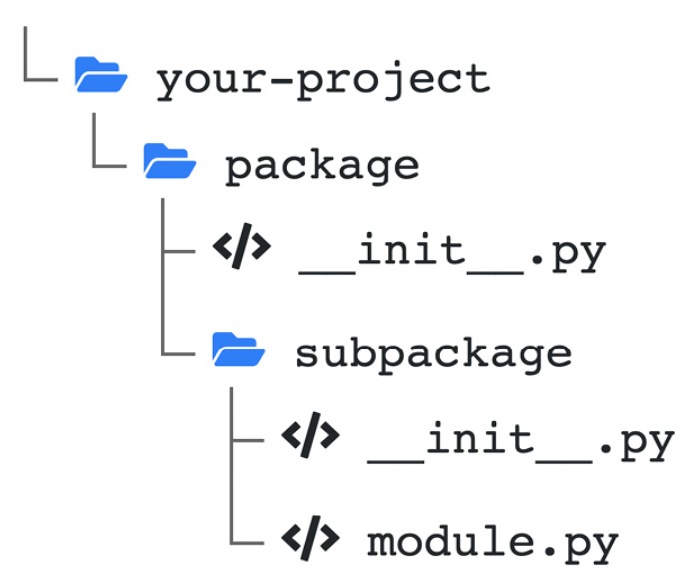


Entonces, vamos a crear nuestra estructura de proyecto FastAPI:

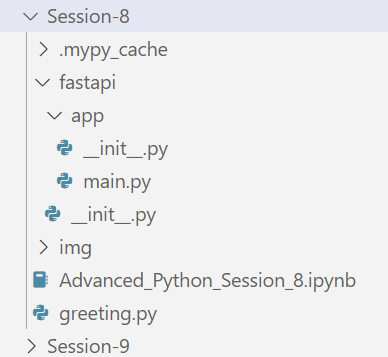

Nota que incluimos un archivo __init__ en cada carpeta.

In [16]:
# We install fastapi in the virtual environment
%pip install fastapi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 8.3.1 Crea un script Python main.py con el siguiente código

```python
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
async def hello_world():
    return {"hello": "world"}
```

Y ejecuta el script con el siguiente código:

```cd fastapi
uvicorn app.main:app --reload
```

Echa un vistazo a cómo se ejecuta en la terminal en Visual Studio Code:

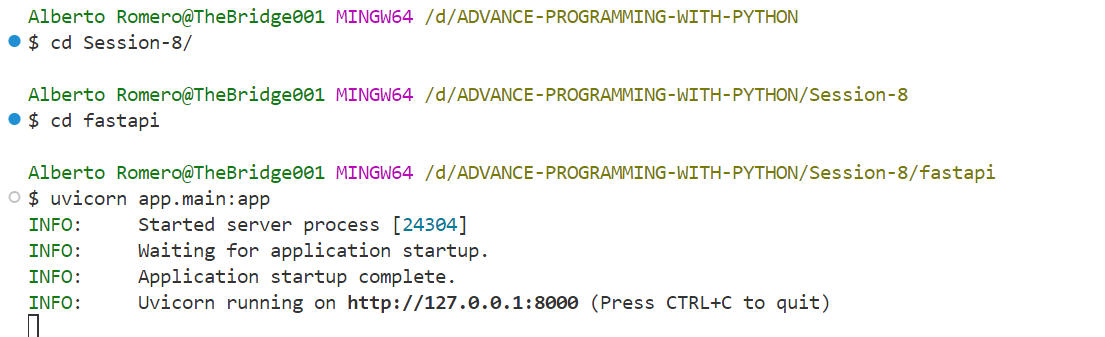

Una de las características más amadas de FastAPI es la documentación interactiva automática.
Si abres la URL http://localhost:8000/docs en tu navegador, deberías obtener una interfaz web que se ve similar a la siguiente captura de pantalla:

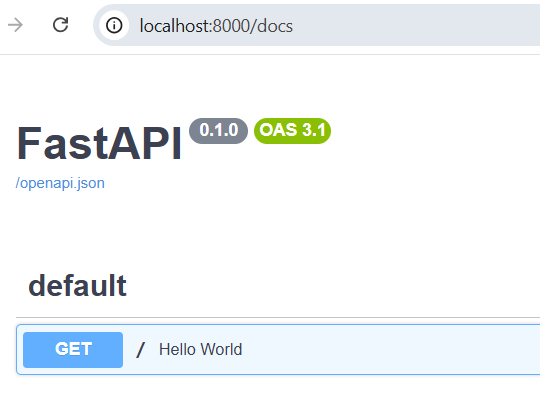

FastAPI listará automáticamente todos tus endpoints definidos y proporcionará documentación sobre las entradas y salidas esperadas.
Incluso puedes probar cada endpoint directamente en esta interfaz web.<br> Bajo el capó, se basa en la especificación OpenAPI y las herramientas asociadas de Swagger.

#### 8.4 Gestión de Parámetros de Solicitud

El propósito principal de una API REST (Transferencia de Estado Representacional) es ofrecer un método sistemático para interactuar con datos. <br>

Como resultado, es importante que el usuario proporcione información específica para personalizar la respuesta que requiere, como **parámetros de ruta**, **parámetros de consulta**, **cuerpos de solicitud**, **encabezados**, etc.

En muchos frameworks web, típicamente necesitas trabajar con un objeto request para extraer los componentes que te interesan, luego aplicar validación manualmente para procesarlos.<br>

Sin embargo, con FastAPI, ¡este proceso está simplificado! :-)
 
FastAPI te permite declarar todos tus parámetros por adelantado, y automáticamente los extraerá de la solicitud y aplicará validación basada en las **anotaciones de tipo** proporcionadas.

**¡Esta es la razón por la que presentamos la anotación de tipos antes: FastAPI la usa para validar datos!**

Ahora, profundicemos en cómo puedes usar esta característica para capturar y validar entradas de diferentes partes de una solicitud.

#### 8.4.1 Parámetros de Ruta

La ruta de la API es el punto principal de interacción para los usuarios finales, lo que la convierte en una ubicación ideal para parámetros dinámicos.

Un ejemplo común es incluir un identificador único para un objeto, como `/users/123`, para recuperar datos específicos.

Exploremos cómo definir esto en FastAPI.

```python
@app.get("/books/{id}")
async def get_book(id: int):
    return {"id": id}
```

En este ejemplo, creamos una API que espera un entero en el segmento final de su ruta URL.<br> Especificamos esto encerrando el nombre del parámetro entre llaves dentro de la ruta.<br> Luego, definimos el mismo parámetro como un argumento en nuestra función de operación de ruta, asegurando que esté tipado como entero usando una anotación de tipo.

Ahora, ejecutemos el ejemplo de la app FastAPI con Uvicorn.

**Nota**: Usa la opción --reload.

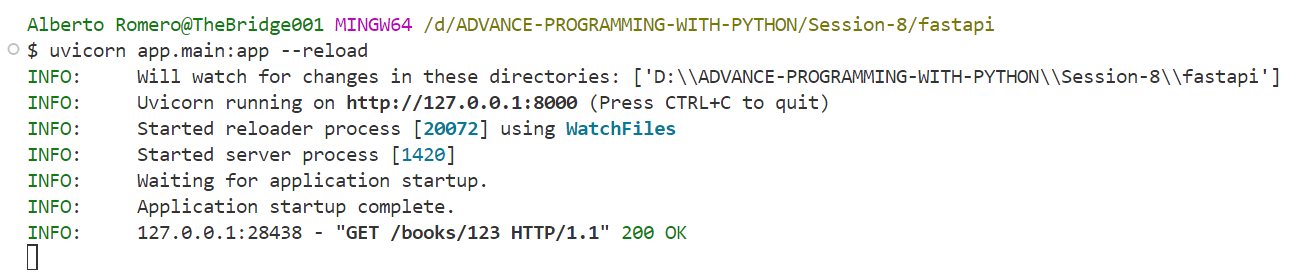

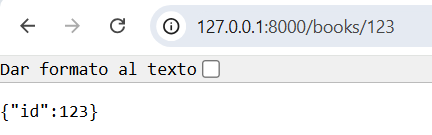

Podemos ir a los docs y verificar qué está pasando.

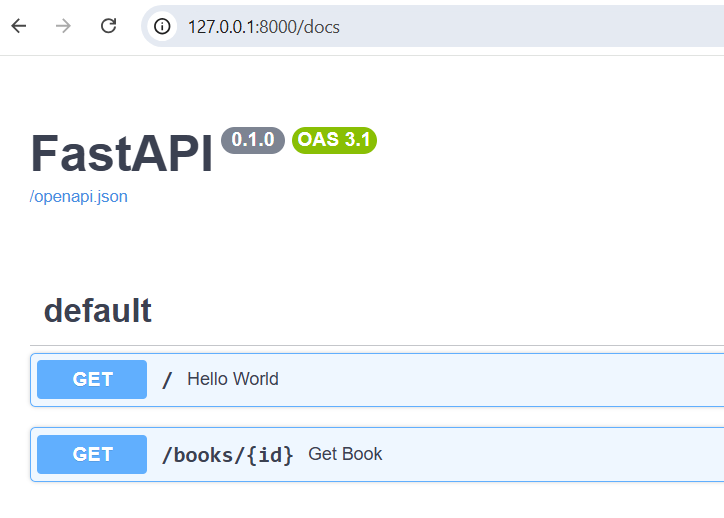

¡Pruébalo!

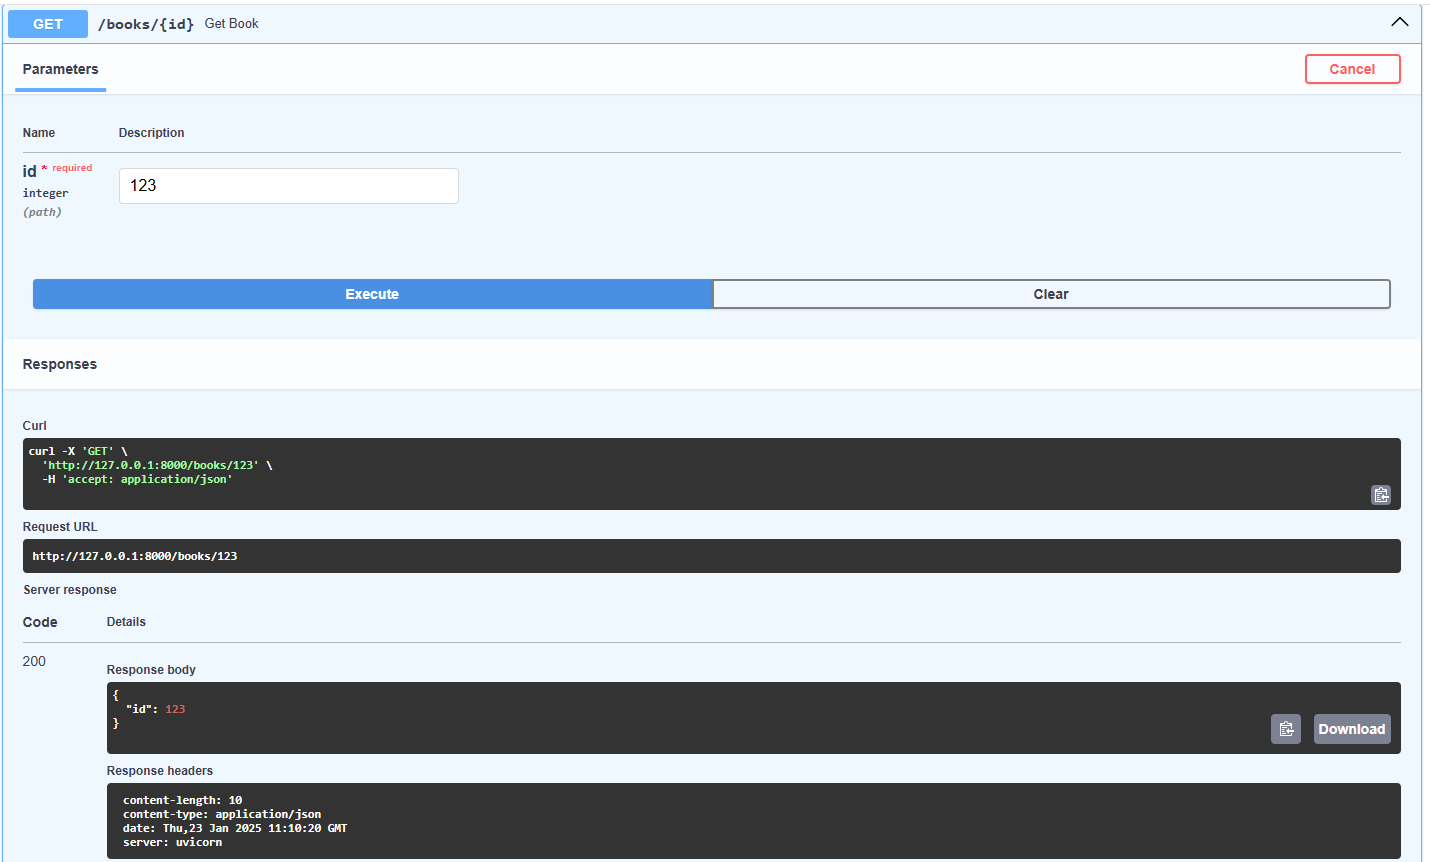

#### 8.4.1.1 Otro endpoint

Ahora vamos a crear otro endpoint
```python
@app.get("/books/{type}/{id}")
async def get_book_type(type: str, id: int):
    return {"type": type, "id": id}
```

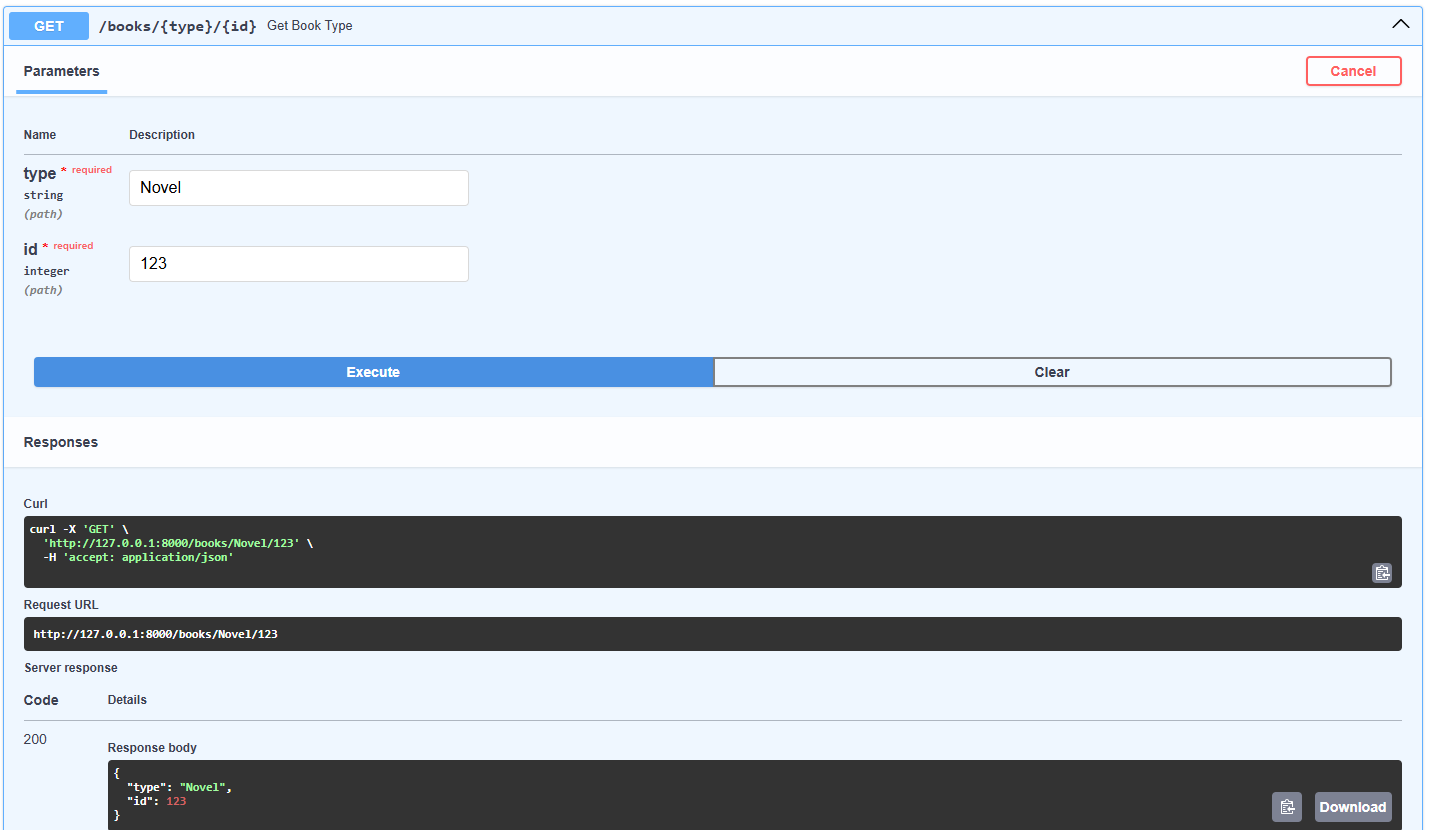

#### 8.4.1.2 Restringir Valores Aceptados

¿Qué pasa si queremos restringir los valores aceptados a un conjunto predefinido?<br>
En este caso, podemos usar la clase `Enum` de Python, que es una gran manera de manejar tales escenarios.

Una **enumeración** nos permite definir una colección de valores válidos para un tipo específico de datos.<br> A continuación hay un ejemplo donde creamos una clase `Enum` para representar diferentes tipos de libros:


```python
from enum import Enum # Se importa Enum

class BookType(str, Enum):  # ¡Herencia!
    REGULAR = "regular"
    BESTSELLER = "bestseller"


@app.get("/books-limited/{type}/{id}")
async def get_book_using_type(type: BookType, id: int):
    return {"type": type, "id": id}
```

Y podemos probarlo en Swagger:

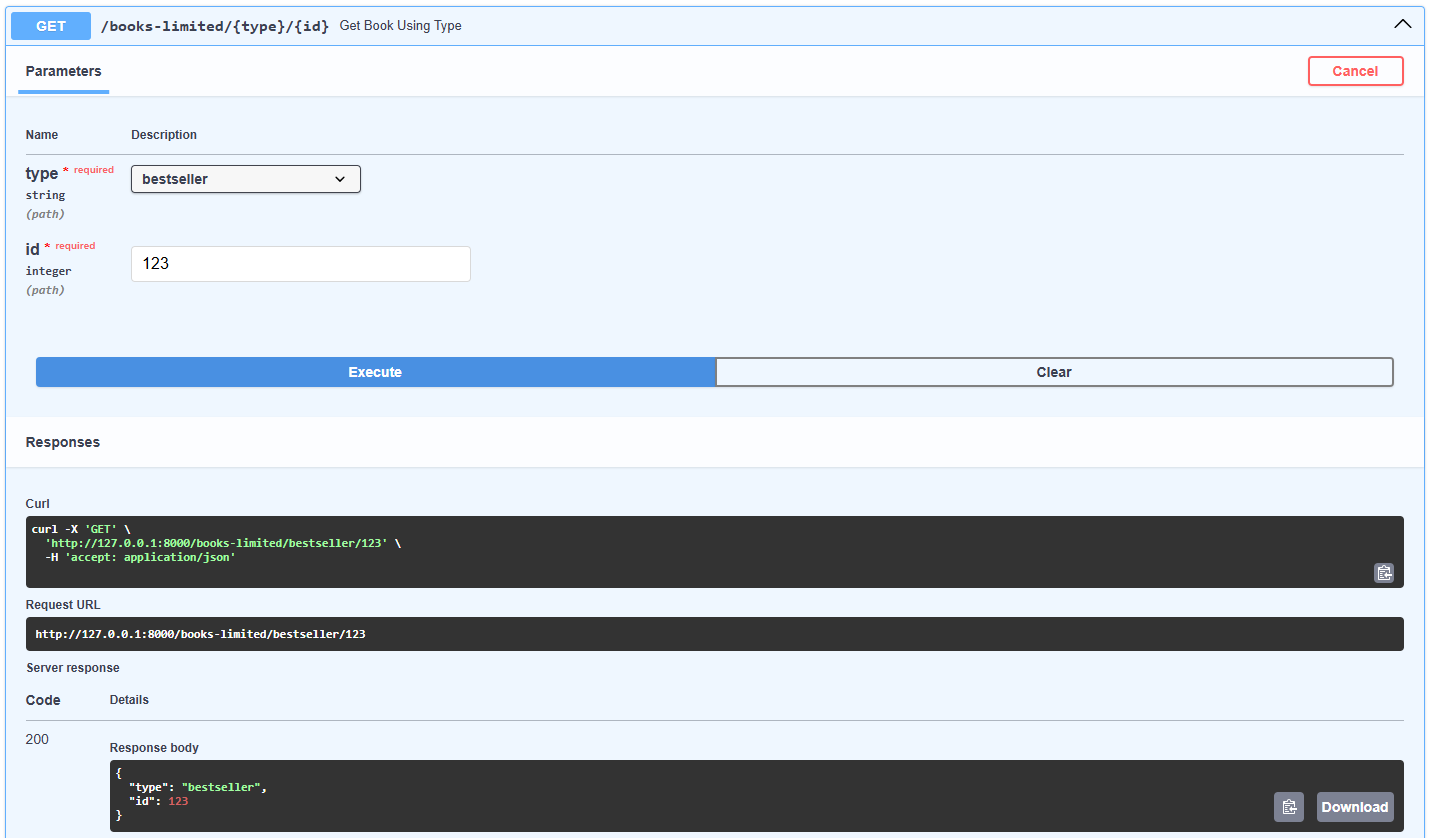

#### 8.4.1.3 Validación Avanzada

Podemos mejorar nuestra validación implementando reglas más sofisticadas, especialmente para números y cadenas.<br>En este escenario, confiar solo en la anotación de tipo es insuficiente.

 En su lugar, utilizaremos las funciones ofrecidas por FastAPI, que nos permiten definir opciones específicas para cada parámetro.
 
  Para parámetros de ruta, la función se llama `Path`. En el ejemplo siguiente, nos aseguraremos de que el argumento `id` esté restringido a valores mayores o iguales a 1:

```python

from fastapi import FastAPI, Path

app = FastAPI()

@app.get("/books-greater-or-equals/{id}")
async def get_book_ge(id: int = Path(..., ge=1)):
    return {"id": id}
```

Puede que notes que usamos los puntos suspensivos (`...`) como primer argumento en el parámetro `Path`.

 Esto indica que el parámetro no tiene un valor predeterminado y es obligatorio.
 
  En este caso, los puntos suspensivos sirven como señal para FastAPI de que explícitamente queremos que el parámetro sea obligatorio.

**Es importante notar que los puntos suspensivos tienen diferentes significados en otros contextos en Python.**<br> La forma en que se usa aquí, para marcar un parámetro como obligatorio, es específica de **FastAPI** y una elección de diseño de sus creadores.

En otros programas de Python, el símbolo de puntos suspensivos puede usarse para diferentes propósitos.

A continuación, podemos definir los argumentos de palabra clave que nos interesan.

Por ejemplo, usamos `ge` para indicar "mayor o igual que", junto con su valor correspondiente.<br> A continuación hay una lista de palabras clave disponibles para validar números: 

**gt** --> Mayor que

**ge** --> Mayor o igual que

**lt** --> Menor que

**le** --> Menor o igual que


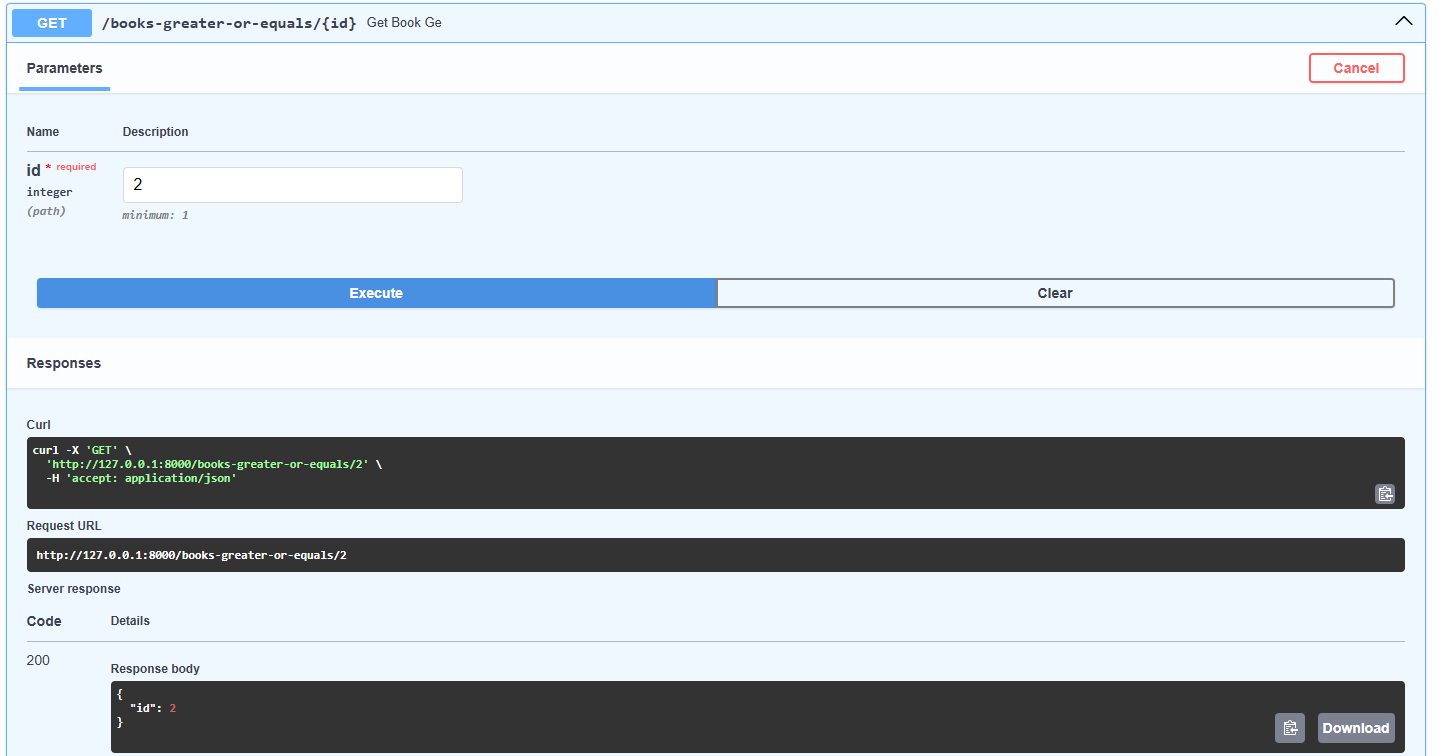

También podemos limitar el número de caracteres de las cadenas: (aqui va la clase)

```python
@app.get("/book-author/{author}")
async def get_book_author(author: str = Path(..., min_length=3, max_length=10)):
    return {"author": author}

```

Vamos a probarlo en Swagger:

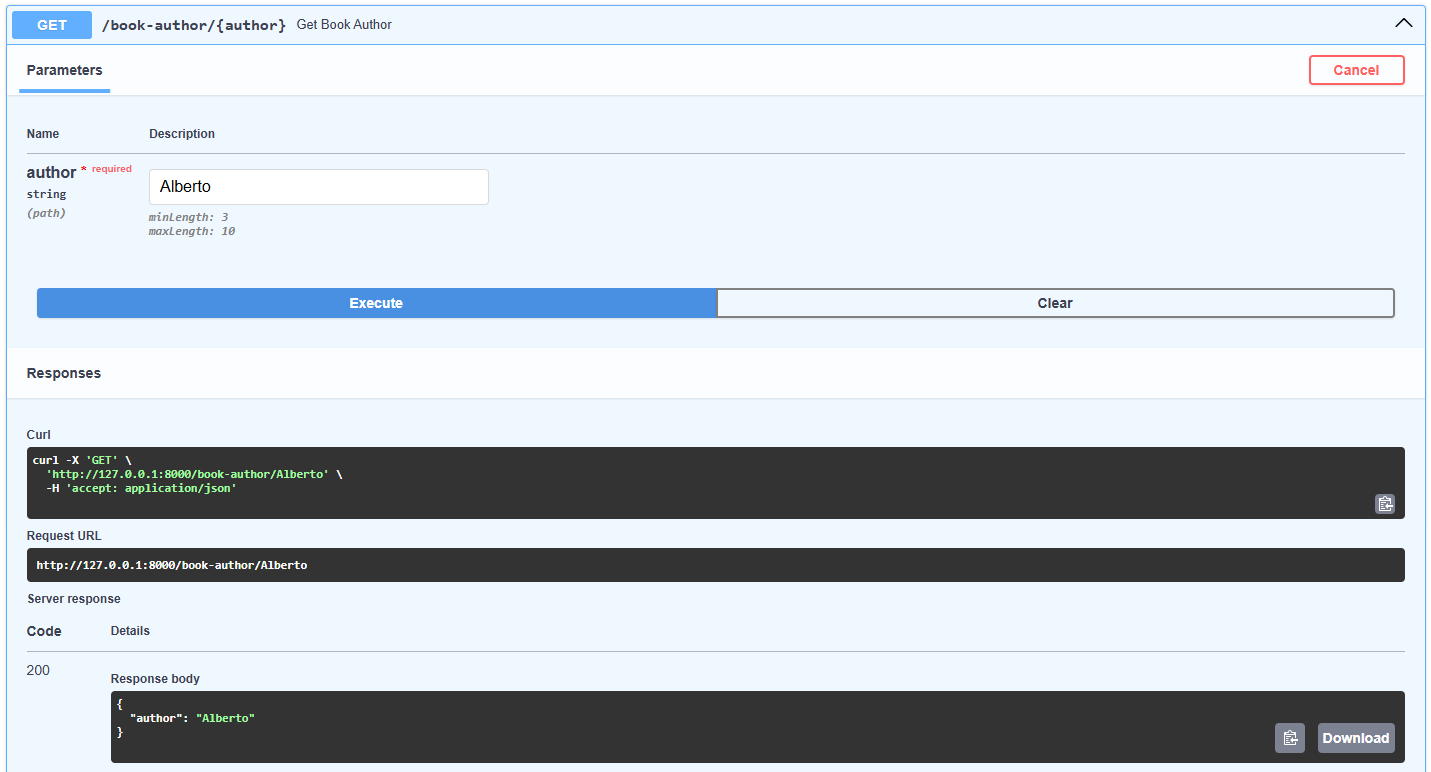

#### 8.4.2 Parámetros de Consulta
 
Los parámetros de consulta son un método ampliamente utilizado para pasar valores dinámicos en una URL.
Aparecen al final de la URL, típicamente en el formato: `?param1=foo&param2=bar`.

<br> En las APIs REST, los parámetros de consulta se utilizan a menudo en **endpoints GET** para manejar tareas como paginación, filtrado, ordenamiento o selección de campos específicos.

Cuando trabajas con FastAPI, encontrarás que definir parámetros de consulta es simple e intuitivo.<br> De hecho, el proceso es idéntico a definir parámetros de ruta.

```python
@app.get("/books-by-query")
async def get_book_by_query(page: int = 1, size: int = 10):
    return {"page": page, "size": size}
```

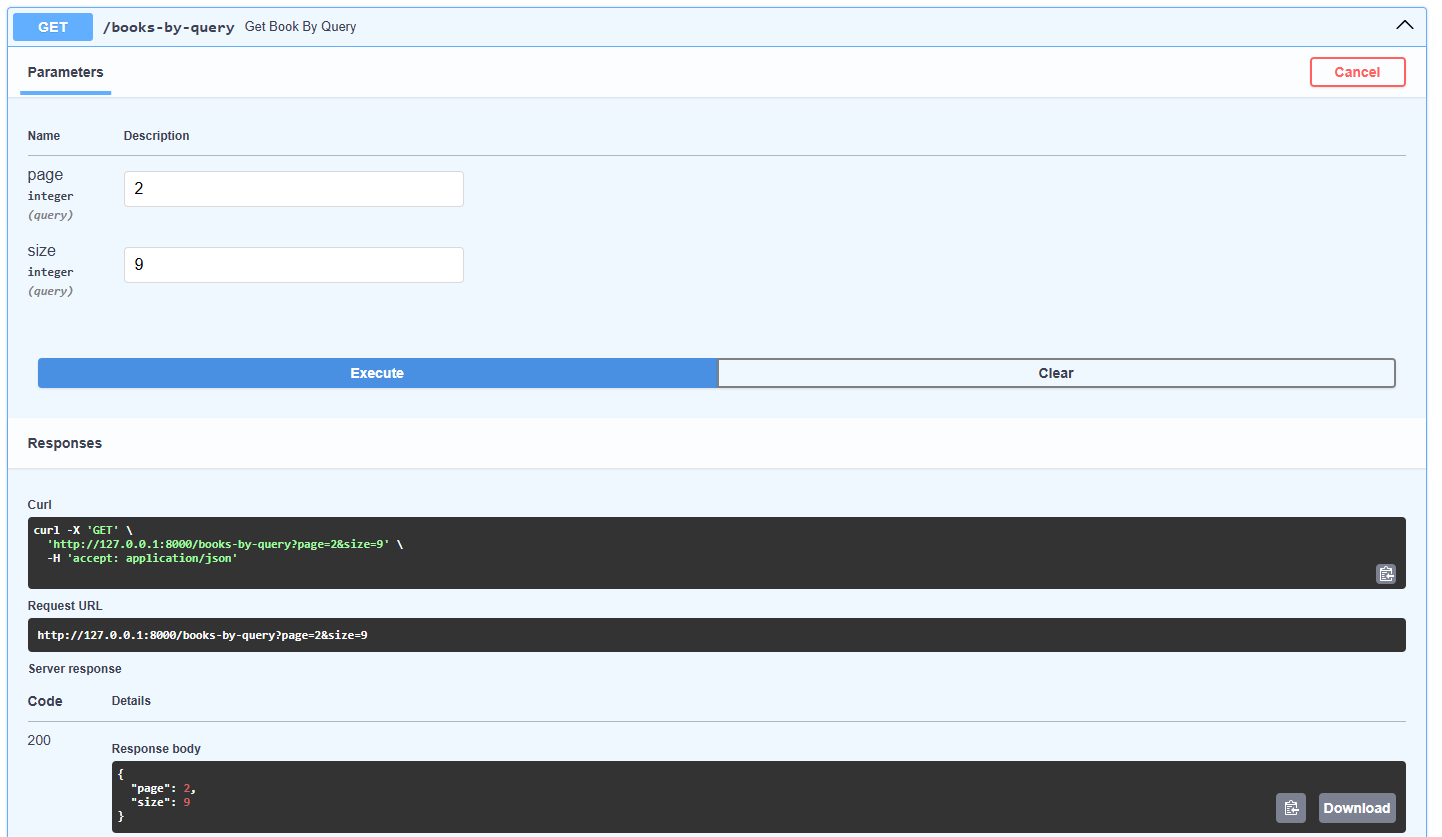

Hemos establecido valores predeterminados para estos argumentos, haciéndolos opcionales al llamar a la API.

Si necesitas definir un parámetro de consulta obligatorio, simplemente omite el valor predeterminado.

Otro endpoint.
En este caso es un parámetro de consulta con una enumeración.

```python
class BooksFormat(str, Enum):
    SHORT = "short"
    FULL = "full"

@app.get("/books-format")
async def get_book_format(format: BooksFormat):
    return {"format": format}
```

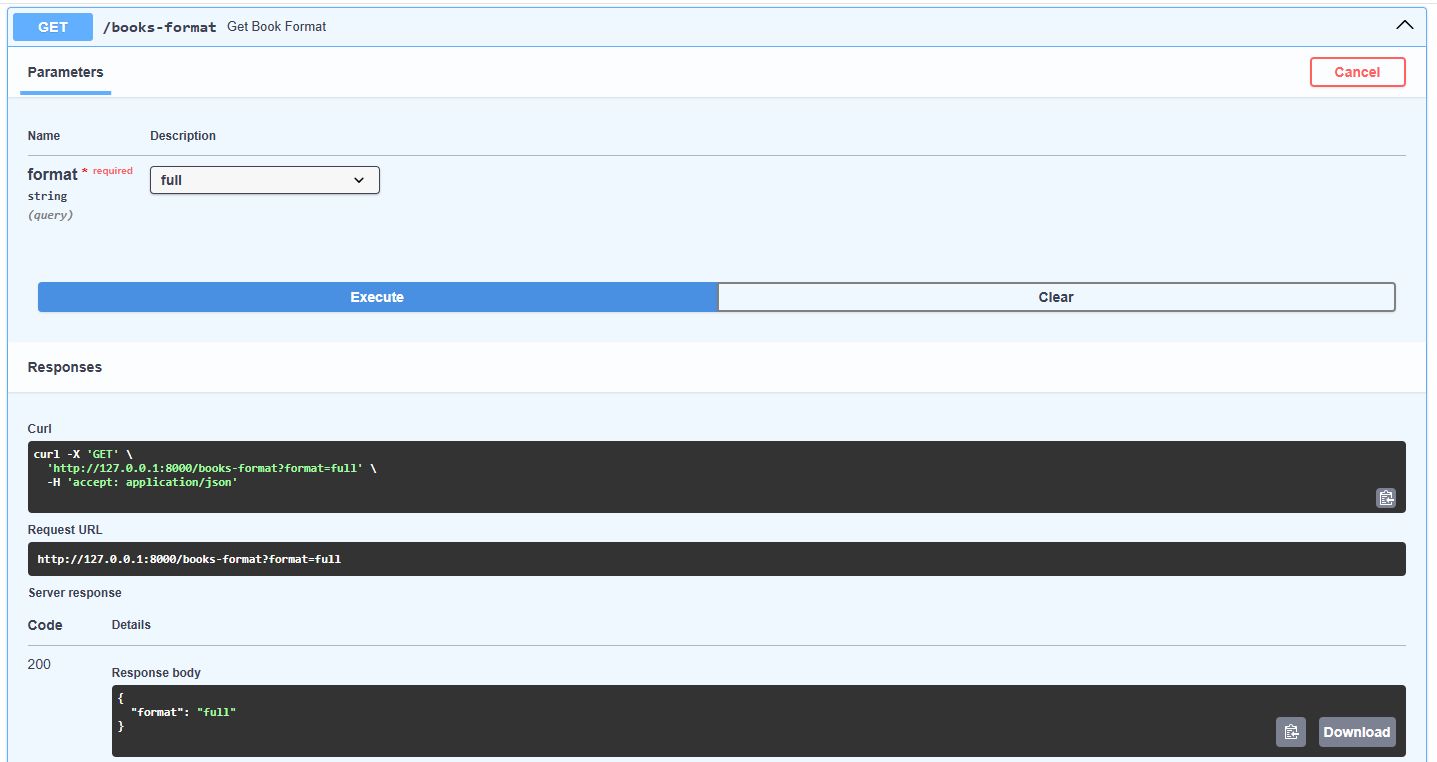

Aquí, nos aseguramos de que el valor de page sea mayor que 0 y el tamaño sea menor o igual a 100.

Nota que el valor del parámetro predeterminado se establece en el primer argumento de la función Query.

```python
from fastapi import Query

@app.get("/books-query")
async def get_book_query(page: int = Query(1, gt=0), size: int = Query(10, le=100)):
    return {"page": page, "size": size}
```

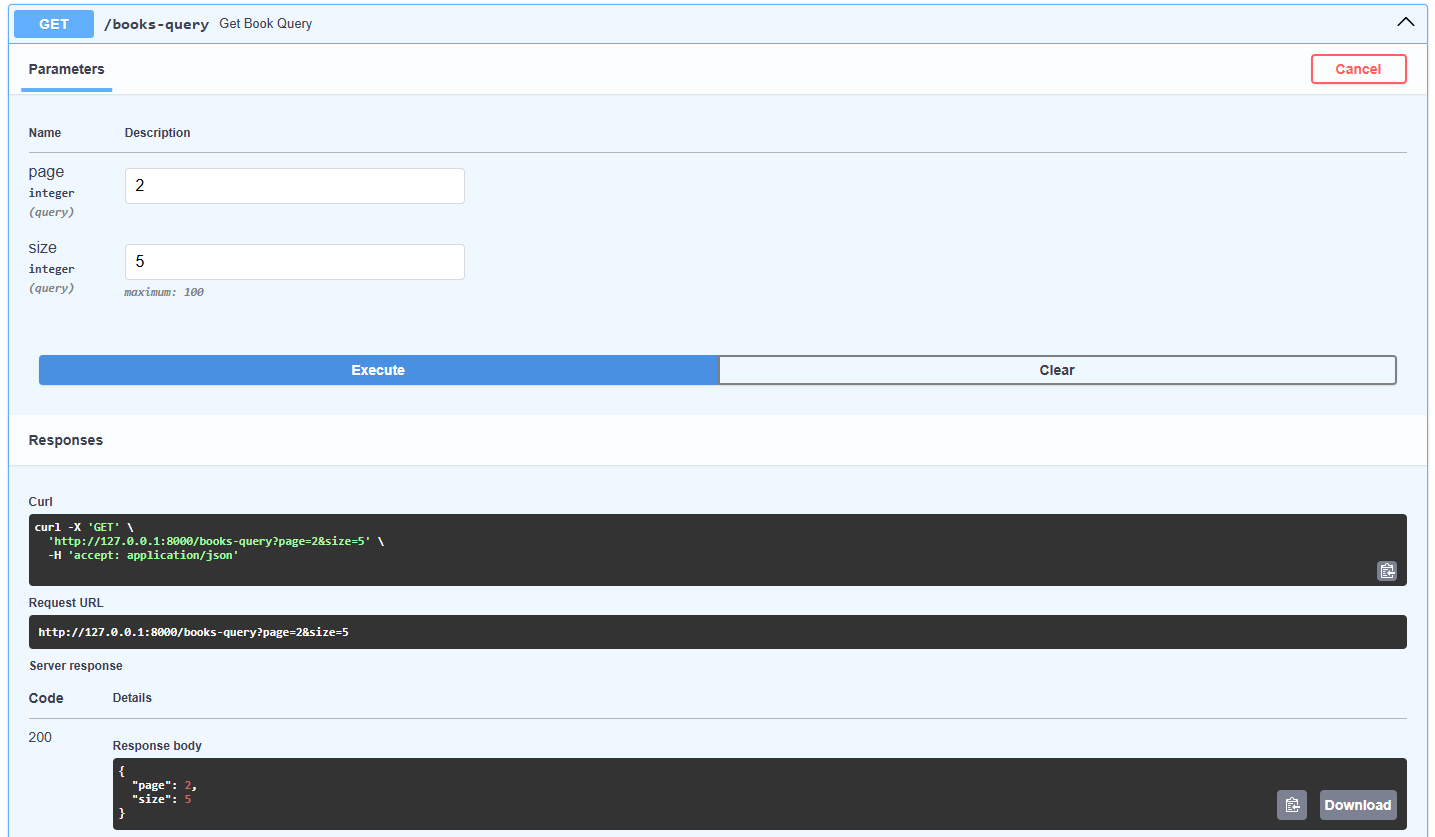

#### 8.4.3 El Cuerpo de la Solicitud

En una solicitud HTTP, el cuerpo contiene los datos brutos, como documentos, archivos o envíos de formularios.

Al trabajar con una API REST, estos datos típicamente están codificados en JSON y se usan para crear objetos estructurados en una base de datos.

<u>Buenas noticias: ¡un JSON son solo listas y diccionarios! </u>

Para casos básicos, acceder a datos del cuerpo funciona de manera similar a usar parámetros de consulta.

La diferencia clave es que debes usar explícitamente la función `Body` para recuperarlo.

 **De lo contrario, FastAPI buscará por defecto los datos en los parámetros de consulta**.<br> Veamos un ejemplo simple donde queremos enviar algunos datos de libros (por cierto, ¡nuestro primer **POST** de FastAPI!).

```python
@app.post("/books-body")
async def create_book(title: str = Body(...), pages: int = Body(...)):
    return {"title": title, "pages": pages}
    
```
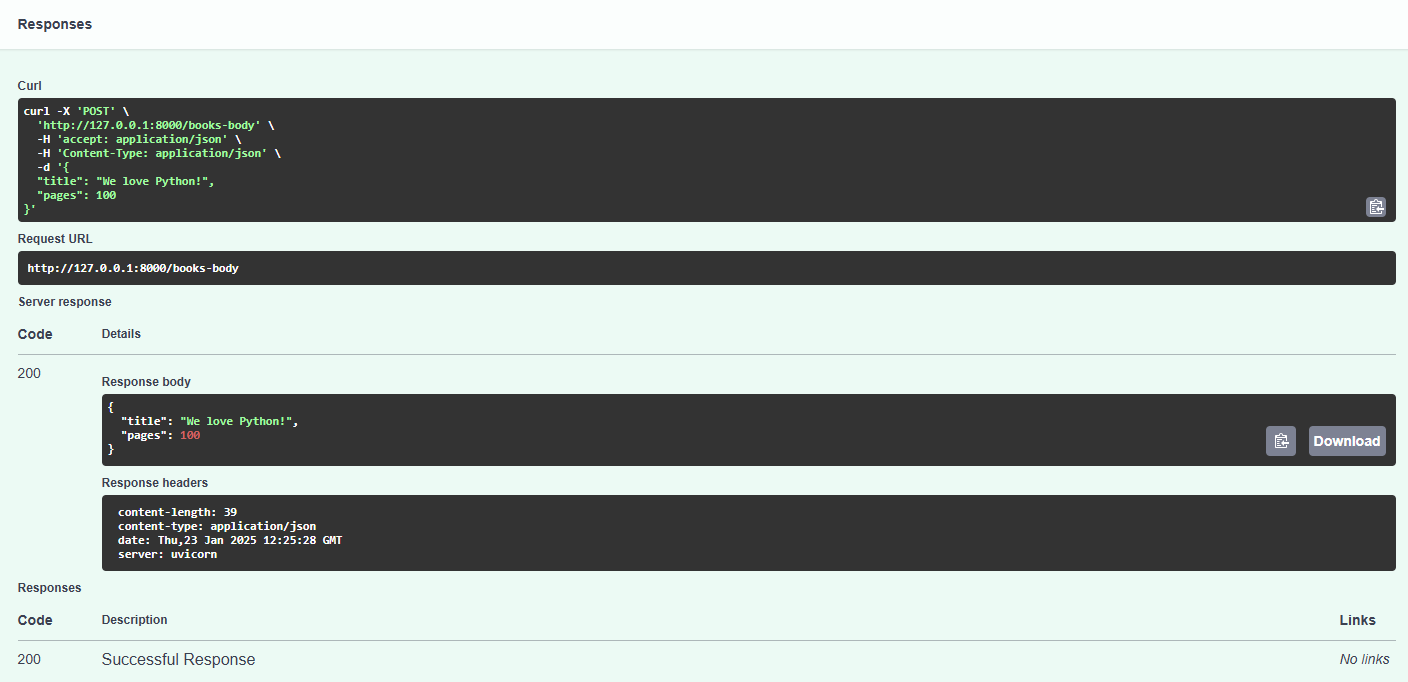

Generalmente, **no aplicamos validación de datos en el Body**, porque aunque podríamos, no es la mejor opción.<br>
Usaremos **modelos Pydantic**.

**FastAPI** se basa en **modelos Pydantic para la validación de datos** porque Pydantic es una biblioteca de Python diseñada para este propósito.

Aprovecha clases y anotaciones de tipo para asegurar que los datos se validen correctamente.
De hecho, las funciones `Path`, `Query` y `Body` que hemos explorado hasta ahora realmente usan Pydantic <u>detrás de escena para manejar la validación!</u>

Veremos Pydantic en sesiones futuras.

#### 8.5 Accediendo al Objeto Request Bruto

Puede haber situaciones en las que necesites acceder al objeto de solicitud bruto junto con todos sus datos asociados.

Esto se puede hacer declarando un argumento en tu función de operación de ruta, usando la clase `Request` como anotación de tipo.

```python
from fastapi import Request

@app.get("/home-request")
async def get_request_object(request: Request):
    return {"path": request.url.path}
```

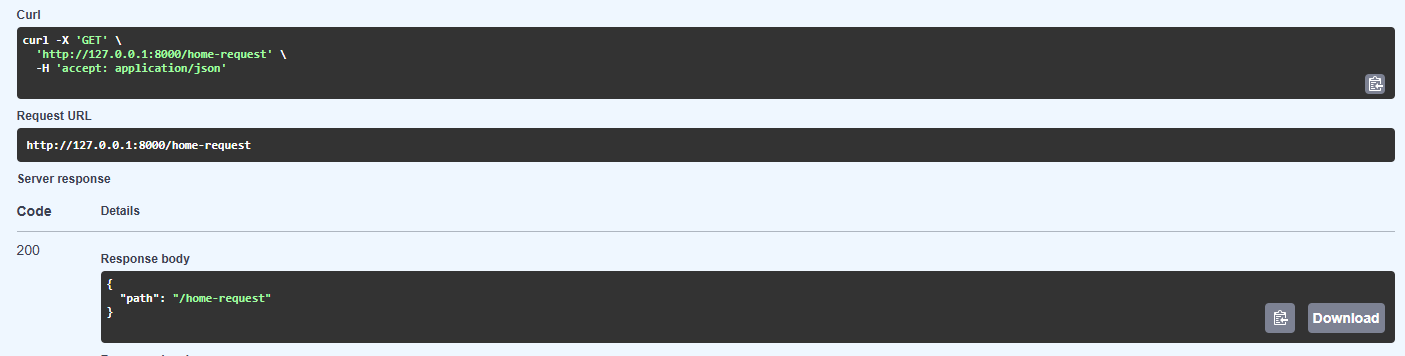

Ahora hemos cubierto los fundamentos del manejo de datos de solicitud en FastAPI.

Como has visto, el enfoque es consistente a través de diferentes partes de la solicitud HTTP:

**solo especifica el argumento al que quieres acceder, agrega una anotación de tipo y usa una función de parámetro para guiar a FastAPI sobre dónde buscar.**

Incluso puedes incorporar lógica de validación para asegurar que los datos cumplan con tus requisitos.

#### 8.6 Personalizando la respuesta

Podemos personalizar la respuesta.

```python
from fastapi import HTTPException, status

@app.post("/check-id")
async def check_id(id: str = Body(...), validated_id: str = Body(...)):
    if id != validated_id:
        raise HTTPException(
            status.HTTP_400_BAD_REQUEST,
            detail="Los id's no coinciden",
        )
    return {"message": "Los Id's coinciden."}
```

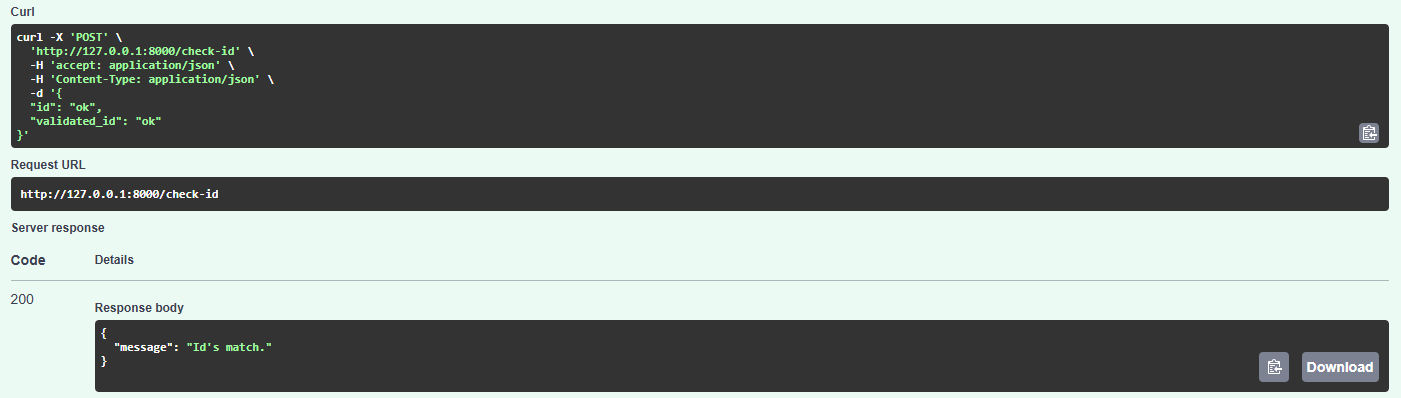

#### 8.7 Organizando un Proyecto Más Grande con Múltiples Routers
Al desarrollar una aplicación web del mundo real, tu base de código probablemente se volverá extensa, incluyendo modelos de datos, endpoints de API y varios servicios.

Naturalmente, todo esto no puede estar contenido en un solo archivo.<br> Para asegurar que el proyecto permanezca mantenible y escalable, es esencial estructurarlo efectivamente.

FastAPI proporciona el concepto de routers, que son esencialmente componentes modulares de tu API.<br> Cada router típicamente maneja un recurso o dominio específico, como "books" o "authors".

 ¡Veremos esto en sesiones futuras!